# How to reshape the layout of tables

## Sort table rows

First, let's import pandas as pd and load in our data for air quality and titanic 

In [1]:
import pandas as pd


In [2]:
titanic = pd.read_csv("../../data/titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
air_quality = pd.read_csv("../../air_quality_datasets/air_quality_long.csv", index_col="date.utc", parse_dates=True)

In [5]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


Let's say that we want to *sort* Titanic data according to the age of the passengers.

We can use the `sort_values()` method.

In [6]:
titanic.sort_values(by="Age").head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
831,832,1,2,"Richards, Master George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
305,306,1,1,"Allison, Master Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
827,828,1,2,"Mallet, Master Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
381,382,1,3,"Nakid, Miss Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
164,165,0,3,"Panula, Master Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S


Now, let's say that we want to sort the Titanic data according to the cabin class and age in descending order. 

In [7]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


**NOTE:** with `DataFrame.sort_values()` the rows in the table are sorted according to the defined column(s). The index will follow the row order. 

More details about sorting of tables is provided in the user guide section on <a href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-sorting">sorting data</a>.

## Long to Wide Table Format

Let's use a *small subset* of the air quality data set. We focus only on **NO<sub>**2**</sub>** and only use the first two measurements of each location (i.e. the head(2) of each group). The subset of data will be called no2_subset.

In [8]:
#filter for no2 data only
no2 = air_quality[air_quality["parameter"] == "no2"]
no2

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³


In [9]:
# use 2 measurements (head) for each location (groupby)
no2_subset = no2.sort_index().groupby(["location"]).head(2)



In [10]:
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


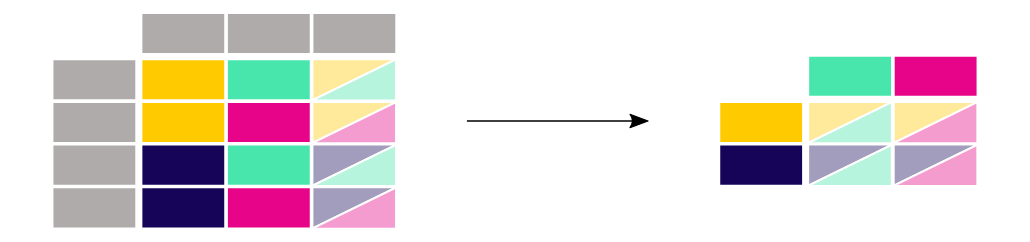

I want the values for the three stations as separate columns next to each other. 

In [11]:
no2_subset.pivot(columns="location",values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


The `pivot()` function is purely reshaping of the data: a single value for each index/column combination  is *required*

In [12]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


<Axes: xlabel='date.utc'>

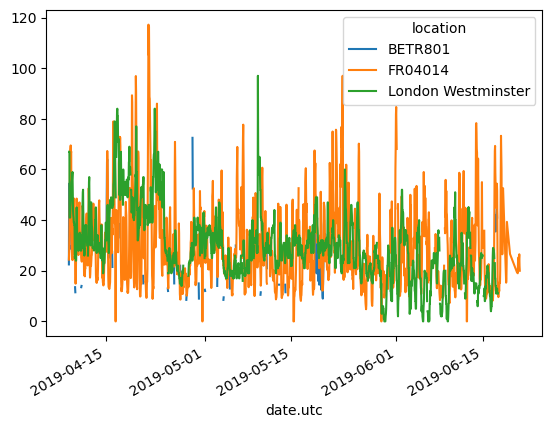

In [13]:
no2.pivot(columns="location", values="value").plot()

When the `index` parameter is not defined, the existing index (row labels) is used.

For more information about `pivot()`, see the user guide section on <a href ="https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-reshaping">pivoting DataFrame objects</a>.

## Pivot table
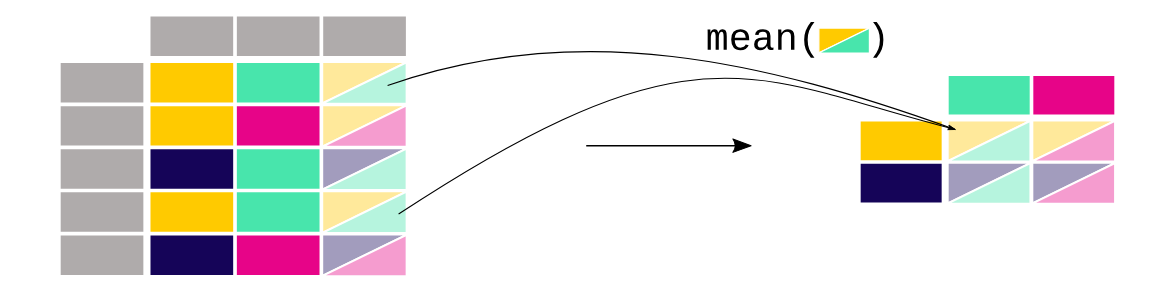


I want the mean concentrations for NO<sub>2</sub> &  PM<sub>2.5</sub>
 in each of the stations in table form.

In [14]:
air_quality.pivot_table(
    values="value", index="location", columns="parameter", aggfunc="mean"
)

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


* In this case, the data is only rearranged. When multiple values need to be aggregated (in this specific case, the values on different time steps), `pivot_table()` can be used, providing an aggregation function (e.g. `mean()`) on how to combine these values.
* Pivot table is a well-known concept in spreadsheet software. When interested in the rowcolumn margins (subtotals) for each variable, set the margins parameter to `True`:

In [15]:
air_quality.pivot_table(
    values="value",
    index="location",
    columns="parameter",
    aggfunc="mean",
    margins=True
)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


For more information about pivot_table(), see the user guide section on <a href="https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot">pivot tables</a>.

#### NOTE: 
In case you are wondering, `pivot_table()`is indeed directly linked to `groupby()`. The same result can be derived by grouping on both `parameter` and `location`:

In [16]:
air_quality.groupby(["parameter", "location"])[["value"]].mean()

value
parameter location                     
no2       BETR801             26.950920
          FR04014             29.374284
          London Westminster  29.740050
pm25      BETR801             23.169492
          London Westminster  13.443568

## Wide to long format
* Starting again from the wide format table created in the previous section, we add a new index to the `DataFrame` with `reset_index()`.

In [17]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()

In [18]:
no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


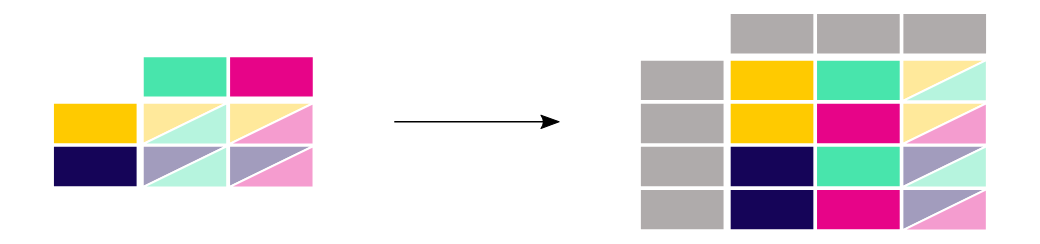

Now, let's say we want to collect all air quality data NO<sub>2</sub> measurements in a single column (long format).

In [19]:
no_2= no2_pivoted.melt(id_vars="date.utc")
no_2.head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


The `pandas.melt()` method on a `DataFrame` converts the data table from wide format to long format. <br> And, the column headers become the variable names in a newly created column.

* The solution is the short version of on how to apply `pandas.melt()`. The method will _**melt**_ all columns NOT mentioned in id_vars together into two columns:
    * A column with the column header names
    * And, a column with the values itself  - this column (the latter), gets the name `value` by default.

  <br>

* The parameters passed to `pandas.melt()` can be defined in more detail:

In [20]:
no_2 = no2_pivoted.melt(
    id_vars="date.utc",
    value_vars=["BETR801", "FR04014", "London Westminster"],
    value_name="NO_2",
    var_name="id_location",
)

In [21]:
no_2.head()


,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


#### NOTE: 

The additional parameters have the following effects:

* `value_vars` defines which columns to melt together (stack)
* `value_name` provides a custom **column name** for the values column instead of the default name `value`.
* `var_name` provides a custom column name for the column collecting the column header names.
    * Otherwise, it takes the index name or a default `variable`.
 
* Therefore, the arguments `value_name` and `var_name` are just arbitrarily defined names for the two generated columns. The columns to melt are defined by `id_vars` and `value_vars`.

## REMEMBER:
* Sorting by one or more columns is supported by `sort_values`
* The `pivot` function is `purely restructuring of the data, `pivot_table` supports aggregations.
* The reverse of `pivot` (long to wide format) is `melt` (wide to long format).

A full overview is available in the `pandas` user guide on the pages about <a href="https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping">reshaping and pivoting</a>.